<a href="https://colab.research.google.com/github/Hafiz-wave/Project-for-Data-Science-Analyst/blob/main/Breast_Cancer_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/breast-cancer-wisconsin.data 2 (2).txt')

df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [2]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
df.describe(include = 'all')

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698,698.000000,698.000000,698.000000,698.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,NaN,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,NaN,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [4]:
df.drop(['Id'], axis=1, inplace=True)

df.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [5]:
df['Bare_Nuclei'].value_counts()

,count
Bare_Nuclei,
1,401
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9


In [6]:
df['Bare_Nuclei']=df['Bare_Nuclei'].replace('?', 11)

In [7]:
df['Bare_Nuclei']= df['Bare_Nuclei'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              698 non-null    int64
 1   Uniformity_Cell_Size         698 non-null    int64
 2   Uniformity_Cell_Shape        698 non-null    int64
 3   Marginal_Adhesion            698 non-null    int64
 4   Single_Epithelial_Cell_Size  698 non-null    int64
 5   Bare_Nuclei                  698 non-null    int64
 6   Bland_Chromatin              698 non-null    int64
 7   Normal_Nucleoli              698 non-null    int64
 8   Mitoses                      698 non-null    int64
 9   Class                        698 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [9]:
df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
X = df[['Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']].values

type(X)

numpy.ndarray

In [11]:
X[:5]

array([[ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1]])

In [12]:
y = df['Class'].values

y[:5]

array([2, 2, 2, 2, 4])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(558, 9)
(140, 9)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()


#training
neigh.fit(X_train, y_train)

#prediction

y_hat = neigh.predict(X_test)


#Evaluation

print('The accuracy is ', accuracy_score(y_test, y_hat)*100)

The accuracy is  98.57142857142858


[0.95714286 0.93571429 0.97857143 0.97857143 0.98571429 0.98571429
 0.97857143 0.97857143 0.97857143]




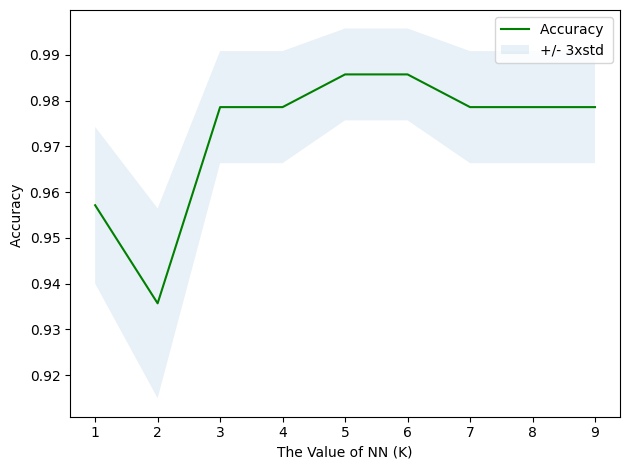



The best accuracy was with 0.9857142857142858 with k= 5


In [15]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): #loop

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train) #learning
    yhat=neigh.predict(X_test) #predicting
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) #evaluation


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print (mean_acc) # and no#

#evaluation
print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

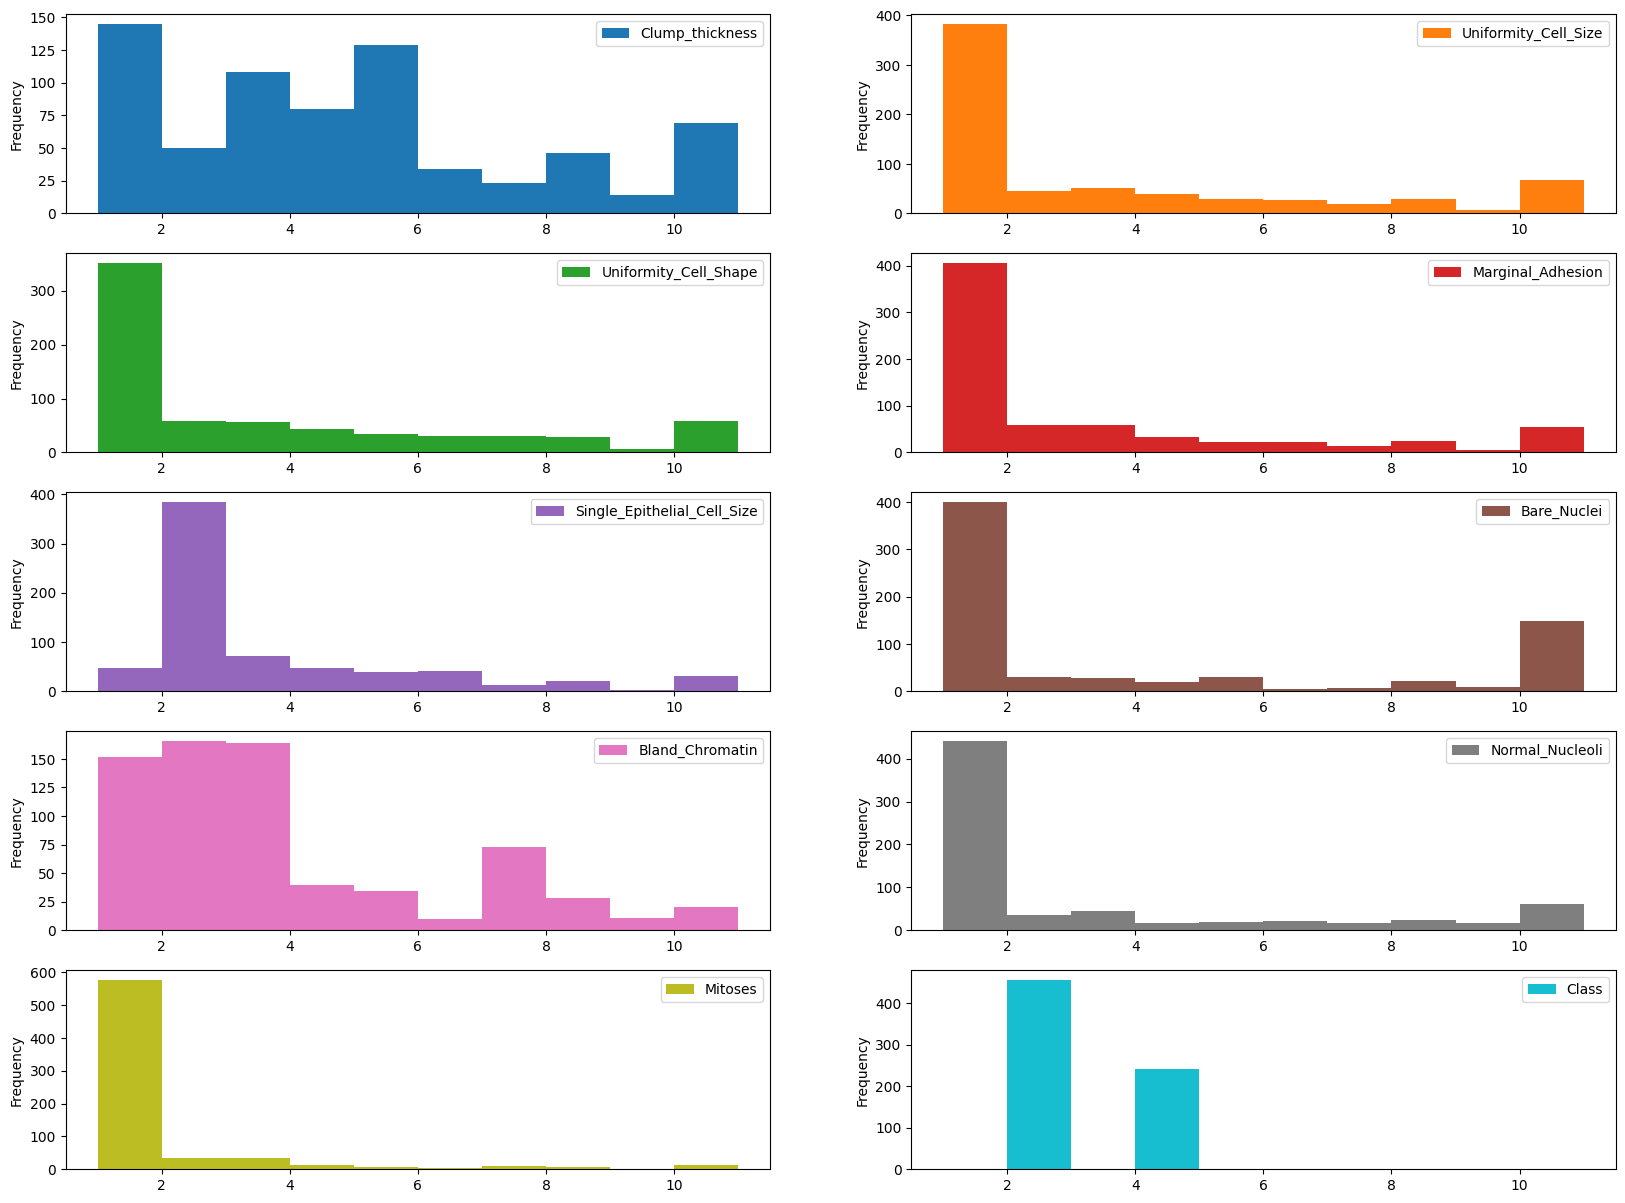

In [16]:
#histogram

plt.rcParams['figure.figsize'] = (20, 15)

df.plot(kind='hist', bins=10, subplots =True, layout=(5,2), sharex = False, sharey = False)
plt.show()

In [17]:
correlations = df.corr()
correlations['Class'].sort_values(ascending = False)

,Class
Class,1.000000
Uniformity_Cell_Shape,0.818794
Uniformity_Cell_Size,0.817772
Bare_Nuclei,0.758383
Bland_Chromatin,0.756732
Clump_thickness,0.716509
Normal_Nucleoli,0.712067
Marginal_Adhesion,0.696605
Single_Epithelial_Cell_Size,0.682618
Mitoses,0.423008


In [18]:
 X = df.drop('Class', axis = 1)

 y = df['Class']

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat)

print(' Confusion matrix is', cm)

print('TP is = ', cm[0,0])
print('TN is = ', cm[1,1])
print('FP is = ', cm[0,1])
print('FN is = ', cm[1,0])

 Confusion matrix is [[86  3]
 [ 0 51]]
TP is =  86
TN is =  51
FP is =  3
FN is =  0


The correct prediction is TP and TN  which means 86+51 = and the incorrect prediction is 3

**Checking the overfitting**

In [20]:
print('The accuracy based on training set is', neigh.score(X_train, y_train))
print('The accuracy based on test set is', neigh.score(X_test, y_test))

The accuracy based on training set is 0.9713261648745519
The accuracy based on test set is 0.9785714285714285


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.97      0.98        89
           4       0.94      1.00      0.97        51

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



**Precision**


*   relationship of correctly predicted positive (TP) to the total prediction of positive (TP +FP),
*   





**Recall**

**Check the over fitting**

sometimes sample provided is not enough and need to check overfitting to fit in the model

In [22]:
#Method 1:
print(' The accuracy based in training set is: ', accuracy_score(y_train, neigh.predict(X_train)))
print(' The accuracy based in test set is: ', accuracy_score(y_test, neigh.predict(X_test)))

 The accuracy based in training set is:  0.9713261648745519
 The accuracy based in test set is:  0.9785714285714285


In [23]:
#Method 2:
print(' The accuracy based in training set is: ', neigh.score(X_train,y_train))
print(' The accuracy based in test set is: ', neigh.score(X_test, y_test))

 The accuracy based in training set is:  0.9713261648745519
 The accuracy based in test set is:  0.9785714285714285


The results provided show that the accuracy on the training set is approximately 96.96%, and the accuracy on the test set is approximately 97.14%. In this case, the test set accuracy being slightly higher than the training set accuracy is not unusual and does not necessarily indicate a problem.

In [24]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           2       1.00      0.98      0.99        89
           4       0.96      1.00      0.98        51

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



**Think of it this way:**

Precision: Out of all the times the model predicted a positive result, how many were actually correct? Focuses on minimizing false positives.

Recall: Out of all the actual positive instances, how many did the model correctly identify? Focuses on minimizing false negatives.

Precision: How good are you at NOT making mistakes when you find someone? (Not yelling "Found you!" when no one is there.)

Recall: How good are you at finding ALL the people hiding?